In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
X = 2 * np.random.rand(100,1)
#Guassain distribution
y = 4 + 3 * X + np.random.randn(100,1)

In [7]:
X_b = np.c_[np.ones((100,1)), X] # X with the bias added to it

In [12]:
#best theta values using normal equation optimization
best_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [13]:
best_theta

array([[4.19087684],
       [2.9252539 ]])

In [35]:
#predictions
X_new = np.array([[0],[2],[3]])

In [36]:
X_new

array([[0],
       [2],
       [3]])

In [38]:
X_new_b = np.c_[np.ones((3,1)), X_new] # X with the bias added to it

In [39]:
X_new_b

array([[1., 0.],
       [1., 2.],
       [1., 3.]])

In [40]:
y_predict = X_new_b.dot(best_theta)

In [41]:
y_predict

array([[ 4.19087684],
       [10.04138463],
       [12.96663853]])

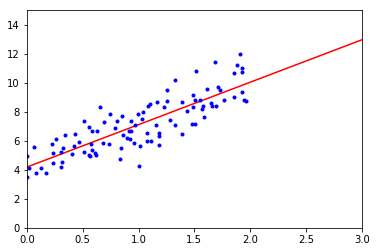

In [45]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,3,0,15])
plt.show()

In [30]:
#sklearn code
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
#best theta values using normal equation optimization
lin_reg.intercept_, lin_reg.coef_

(array([4.19087684]), array([[2.9252539]]))

In [34]:
lin_reg.predict(X_new)

array([[ 4.19087684],
       [10.04138463]])

In [49]:
# Batch gradient descent optimization
eta = 0.1 #learning rate
n_iterations = 1000
m = 100 #no. instances

theta = np.random.randn(2,1) #random initialization

for i in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [50]:
theta

array([[4.19087684],
       [2.9252539 ]])

In [64]:
#stochastic gradient descent with simple learning schedule
n_epoches = 50
t0, t1 = 5, 50 # learning schedule parameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) #random initialization

for epoche in range(n_epoches):
    for i in range(m):
        random_index = np.random.randint(m) #aometimes the instances are repeated because it generates the same number
        #print(random_index)
        xi = X_b[random_index:random_index+1]
        #print(X_b[random_index:random_index+1])
        #print(X_b[random_index])
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoche * m + i)
        #print(eta)
        theta = theta - eta * gradients

In [62]:
theta

array([[4.1045701 ],
       [2.96365059]])

In [69]:
print(type(y.ravel())) #Return a contiguous flattened array

<class 'numpy.ndarray'>


In [75]:
# SGD usinf sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [76]:
#best theta values using normal equation optimization
lin_reg.intercept_, lin_reg.coef_

(array([4.19087684]), array([[2.9252539]]))

In [2]:
# polynomial regression
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X+2 + np.random.randn(m,1)

In [6]:
#use sklearn to trnasform the features to a polynomial features 
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [7]:
X[0]

array([2.14534031])

In [8]:
X_poly[0]

array([2.14534031, 4.60248505])

In [10]:
#sklearn code
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([1.94045285]), array([[1.03596331, 0.54182474]]))

In [58]:
#learning curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range (1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict[:m], y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.plot(X,y,"b.")
    plt.axis([0,80,0,3])
    plt.legend()

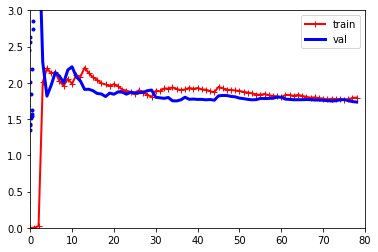

In [61]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

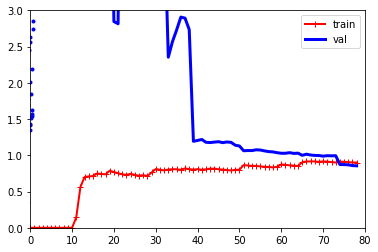

In [62]:
from sklearn.pipeline import Pipeline

poly_regression = Pipeline((
                           ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                           ("sgd_reg", LinearRegression()),
                          ))

plot_learning_curves(poly_regression, X, y)

In [67]:
# logistic regression classififer
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:,3:]
y = (iris["target"] ==2).astype(np.int)

In [71]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) #Return evenly spaced numbers over a specified interval.

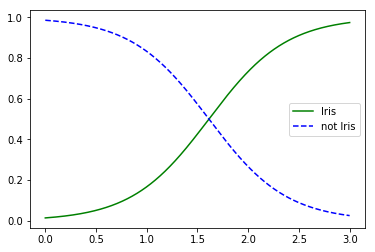

In [80]:
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:, 1],"g-", label="Iris")
plt.plot(X_new, y_prob[:, 0],"b--", label="not Iris")
plt.legend()

In [79]:
plt.plot(X_new, y_prob[:, 0],"b--", label="not Iris")

array([0.01447236, 0.01458489, 0.01469829, 0.01481255, 0.01492768,
       0.0150437 , 0.01516061, 0.01527841, 0.01539711, 0.01551671,
       0.01563724, 0.01575868, 0.01588105, 0.01600436, 0.01612861,
       0.0162538 , 0.01637996, 0.01650707, 0.01663516, 0.01676422,
       0.01689426, 0.0170253 , 0.01715734, 0.01729038, 0.01742443,
       0.01755951, 0.01769561, 0.01783275, 0.01797094, 0.01811017,
       0.01825047, 0.01839183, 0.01853426, 0.01867778, 0.01882238,
       0.01896809, 0.0191149 , 0.01926282, 0.01941186, 0.01956204,
       0.01971336, 0.01986582, 0.02001943, 0.02017421, 0.02033016,
       0.0204873 , 0.02064562, 0.02080514, 0.02096586, 0.0211278 ,
       0.02129096, 0.02145536, 0.02162099, 0.02178788, 0.02195603,
       0.02212544, 0.02229613, 0.02246811, 0.02264139, 0.02281596,
       0.02299186, 0.02316908, 0.02334763, 0.02352752, 0.02370877,
       0.02389138, 0.02407536, 0.02426072, 0.02444747, 0.02463562,
       0.02482519, 0.02501618, 0.02520859, 0.02540245, 0.02559

In [2]:
#Softmax regression
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

In [4]:
X = iris["data"][:,(2,3)] #two features petal length and petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
softmax_reg.predict([[5, 2]])

array([2])

In [6]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

In [ ]:
s